<a href="https://colab.research.google.com/github/jeojildo/fundamentos-int-comp-ciencia-dados/blob/main/Atividade2_pc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2, Pergunta C

---



**Fundamentos Inteligência Computacional e Ciência de Dados**



---



Discente: Jeojildo Pereira


Matricula: 202220070022


Docente: Prof. Dr. Claudomiro de Sousa de Sales Junior



---

**Instruções**



---


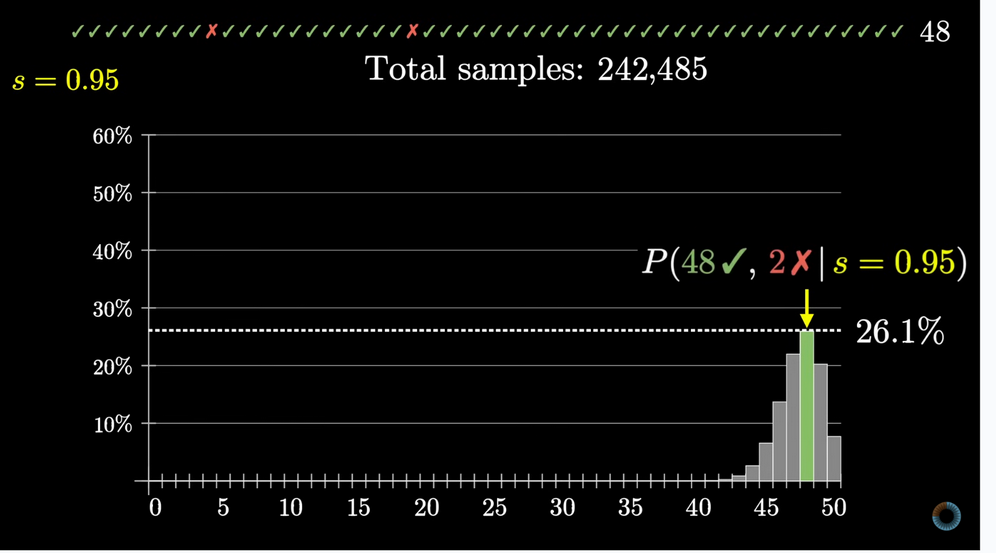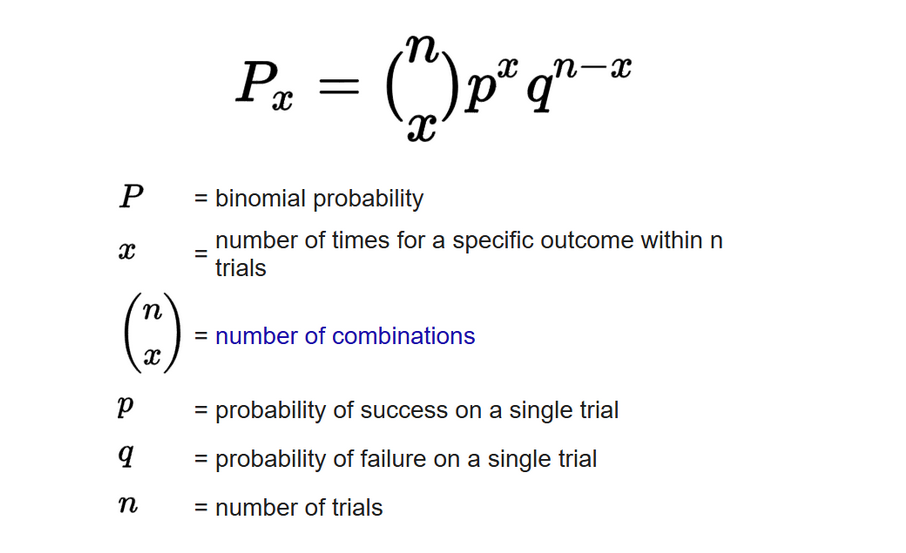

Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

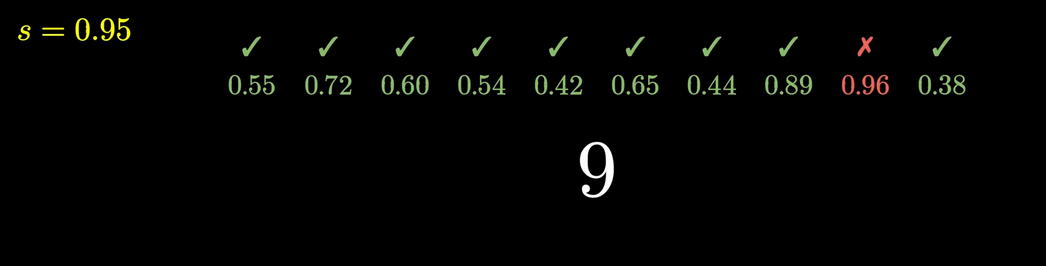


Probabilidade teórica de 48 acertos com s = 0.80: 0.109%


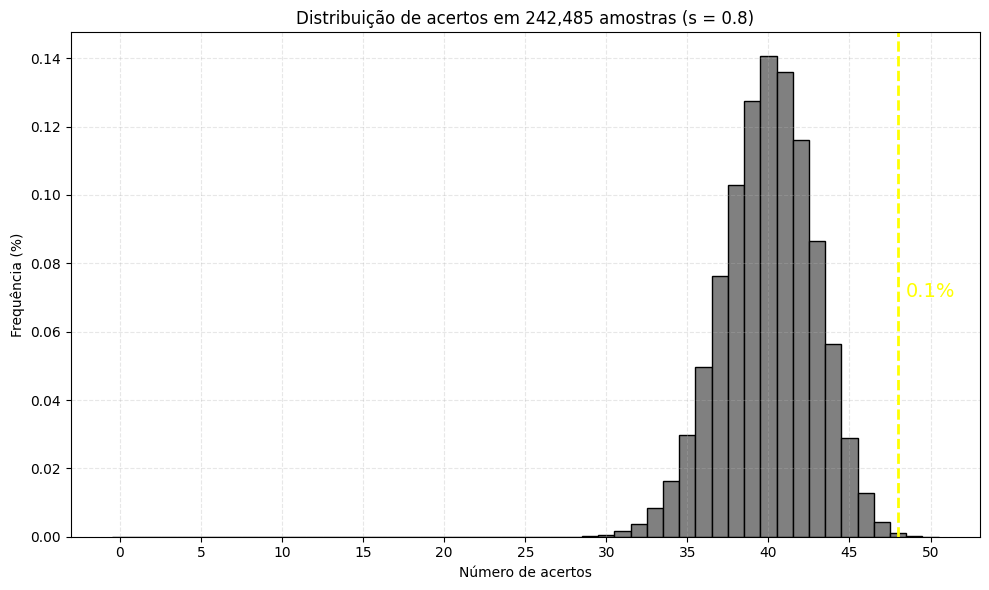

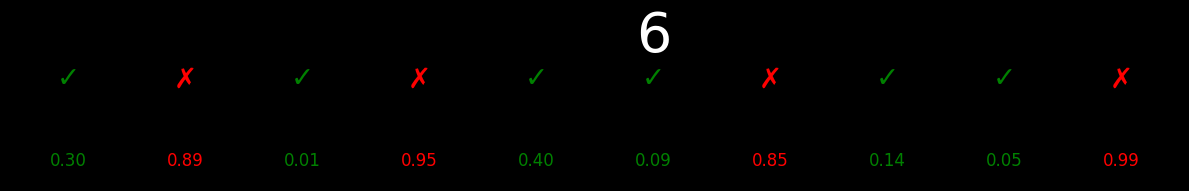

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parâmetros
s = 0.80
n = 50  # número de testes por experimento
k = 48  # número de acertos desejado
total_samples = 242_485

# 1. Probabilidade teórica usando distribuição binomial
prob_teorica = stats.binom.pmf(k, n, s)
print(f"Probabilidade teórica de 48 acertos com s = 0.80: {prob_teorica * 100:.3f}%")

# 2. Simulação de total_samples experimentos
np.random.seed(42)
samples = np.random.binomial(n=n, p=s, size=total_samples)

# 3. Histograma das quantidades de acertos
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(samples, bins=np.arange(n + 2) - 0.5, density=True, color='gray', edgecolor='black')
plt.axvline(k, color='yellow', linestyle='--', linewidth=2)
plt.text(k + 0.5, counts.max() * 0.5, f"{prob_teorica * 100:.1f}%", color='yellow', fontsize=14)
plt.title(f"Distribuição de acertos em {total_samples:,} amostras (s = {s})")
plt.xlabel("Número de acertos")
plt.ylabel("Frequência (%)")
plt.xticks(np.arange(0, n + 1, 5))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Mostrar as 10 primeiras amostras individuais com ✓/✗ (como imagem 2)
first_10 = np.random.rand(10)
successes = first_10 < s
symbols = ['✓' if success else '✗' for success in successes]
colors = ['green' if success else 'red' for success in successes]
values = [f"{val:.2f}" for val in first_10]

fig, ax = plt.subplots(figsize=(12, 2))
ax.axis('off')
for i, (symbol, val, color) in enumerate(zip(symbols, values, colors)):
    ax.text(i, 1, symbol, color=color, fontsize=20, ha='center', va='bottom')
    ax.text(i, 0, val, color=color, fontsize=12, ha='center', va='top')
n_successes = sum(successes)
ax.text(len(successes) // 2, 1.5, str(n_successes), fontsize=40, color='white', ha='center', va='bottom')
fig.patch.set_facecolor('black')
plt.xlim(-0.5, 9.5)
plt.ylim(-0.5, 2)
plt.tight_layout()
plt.show()